# [Astropy](https://www.astropy.org/)
\
![Astropy](https://docs.astropy.org/en/stable/_static/astropy_banner.svg)
\
`astropy` zawiera mnóstwo funkcji i narzędzi do pracy z danymi astronomicznymi.

W dokumentacji można przeczytać, że pakiet ma funkcje dot.:
* struktura danych i transformacje, m.in: stałe, jednostki, czas i data, współrzędne
* obsługa plików (I/O): tabele ascii, pliki fits, votable
* obliczenia: kosmologia, konwolucje i filtrowanie sygnałów, wizualizacja danych, astrostatystyka

# Spis Treści

1. [Struktura danych](#data_structure)
    * [Stałe i jednostki](#const_and_units)
        - [Ćwiczenie nr 1](#ex1)
    * [Obsługa czasu](#timedate)
    * [Współrzędne](#cooridinates)
2. [Obsługa plików](#files)
    * [Otwieranie plików FITS](#fits)
    * [Wyświetlanie - normalizacja](#norm)
3. [Prosta i szybka fotometria aperturowa](#aperture)

# Importowanie i ustawienie notebook-a (uruchomić jako pierwsze!)

In [1]:
# import astropy as ap
import numpy as np

# we will need to plot stuff later
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=data_structure></a>
# 1. Struktura danych

<a id=const_and_units></a>
## Stałe i jednostki

In [2]:
import astropy.constants as const
import astropy.units as u

In [3]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [4]:
print(const.c)
print("-----------------------")
print(const.c.cgs)
print(type(const.c))
print(const.c.to("pc/yr"))  # konwersja jednostek

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
-----------------------
29979245800.0 cm / s
<class 'astropy.constants.codata2018.CODATA2018'>
0.30660139378555057 pc / yr


In [5]:
g = (const.G * const.M_earth) / (const.R_earth) ** 2
print(g)

9.798398133669465 m / s2


In [6]:
print(const.g0.value)

9.80665


In [7]:
(g*80*u.kg).to(u.N)

<Quantity 783.87185069 N>

In [8]:
# dir(const)

In [9]:
# (0.8 * u.arcsec).to(u.parsec)
print((0.5 * u.arcsec).to(u.parsec, equivalencies=u.parallax()))
print((6568 * u.Angstrom).to(u.GHz, equivalencies=u.spectral()))

2.0 pc
456444.0590742996 GHz


In [10]:
grosz = u.def_unit("grosz") # definiowanie własnych jednostek
pln = u.def_unit("pln", 100*grosz)
2.49*pln.to(grosz)

249.00000000000003

In [11]:
fortnight = u.def_unit('fortnight', 14 * u.day)
const.c.to("lyr/fortnight")

<Quantity 0.03832991 lyr / fortnight>

<a id="ex1"></a>
### Ćwiczenie nr 1

Policz prędkość Ziemi w km/s wokół Słońca (zakładając orbitę kołową). Skorzystaj z poniższego wzoru oraz z modułów `constants` i `units`:

$$v = \sqrt{\frac{G M_{\odot}}{r}}$$

<a id="timedate"></a>
## Obsługa czasu

In [12]:
from astropy.time import Time

In [13]:
times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00']
t = Time(times, format='isot', scale='utc')
t

<Time object: scale='utc' format='isot' value=['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']>

In [14]:
t[1]

<Time object: scale='utc' format='isot' value=2010-01-01T00:00:00.000>

In [15]:
t = Time(times)
t

<Time object: scale='utc' format='isot' value=['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']>

In [16]:
t.jd

array([2451179.50000143, 2455197.5       ])

In [17]:
t.mjd

array([51179.00000143, 55197.        ])

In [18]:
nt = Time.now() # current time
print(nt)
nt.sidereal_time('apparent', 'greenwich') 

2021-11-27 08:33:14.626861


<Longitude 12.98600903 hourangle>

In [19]:
nt = Time.now() # current time
t = Time(nt, scale='utc', location=('17d', '51.1d'))
print(t)
t.sidereal_time('apparent')

2021-11-27 08:33:22.232113


<Longitude 14.12146071 hourangle>

<a id="coordinates"></a>
## Współrzędne

In [20]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon

`astropy.coordinates.SkyCoord.from_name` używa Simbad-a do wyszkiwania obiektów po nazwie

Wyszukajmy współrzędne dla NGC6823:

In [21]:
obj_name = "NGC6823"
obj = SkyCoord.from_name(obj_name)

In [22]:
obj

<SkyCoord (ICRS): (ra, dec) in deg
    (295.794, 23.321)>

Użyjmy `astropy.coordinates.EarthLocation` żeby stworzyć obiekt `location` z danymi dot. miejsca obserwacji.
Weźmy obserwatorium w Białkowie:


In [23]:
bialkow = EarthLocation(lat=51.476111*u.deg, lon=16.656667*u.deg, height=130*u.m)
utcoffset = 1*u.hour  # Obecnie mamy czas zimowy
time = Time.now()
time

<Time object: scale='utc' format='datetime' value=2021-11-27 08:33:23.727327>

Skonwertujmy współrzędne do `AltAz`(ymutalnych) w miejscu obserwacji

In [24]:
obj_altaz = obj.transform_to(AltAz(obstime=time,location=bialkow))
print(obj_altaz.alt)

21d23m53.5210115s


In [25]:
y, m, d, _, _, _ = time.ymdhms
midnight = Time(str(y)+'-'+str(m)+'-'+str(d)+' 00:00:00') - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
delta_midnight
night = AltAz(obstime=midnight+delta_midnight, location=bialkow)
obj_altaz = obj.transform_to(night)

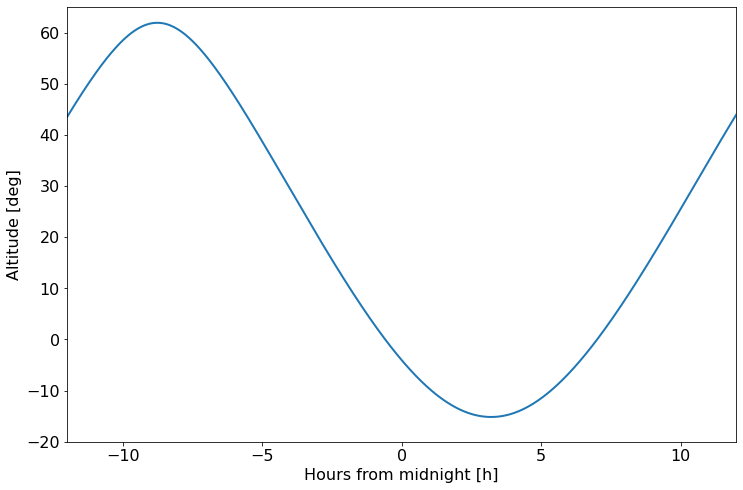

In [26]:
plt.plot(delta_midnight, obj_altaz.alt)
plt.xlim(-12, 12)
plt.ylim(-20, 65)
plt.xlabel('Hours from midnight [h]')
plt.ylabel('Altitude [deg]')
plt.show()

In [27]:
sun_altaz = get_sun(midnight+delta_midnight).transform_to(night)
moon_altaz = get_moon(midnight+delta_midnight).transform_to(night)

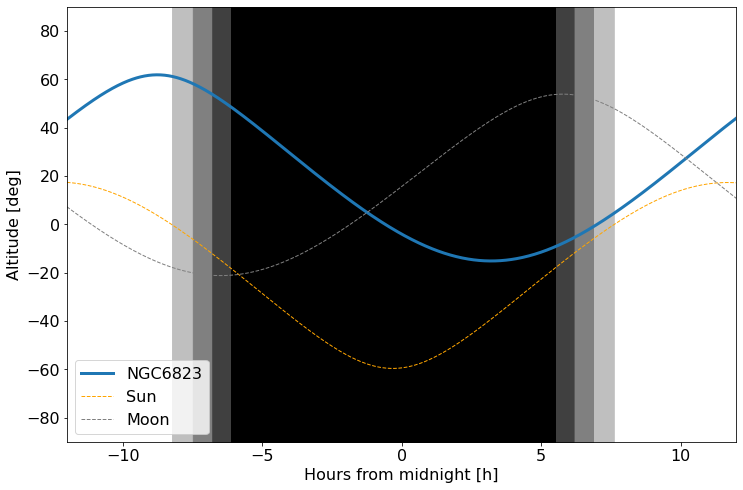

In [28]:
plt.plot(delta_midnight, obj_altaz.alt, lw=3, label=obj_name)
plt.plot(delta_midnight, sun_altaz.alt, color="orange", ls="--", lw=1, label="Sun")
plt.plot(delta_midnight, moon_altaz.alt, color="gray", ls="--", lw=1, label="Moon")
plt.fill_between(delta_midnight, -90*u.deg, 90*u.deg, sun_altaz.alt < -0*u.deg, color='0.75')
plt.fill_between(delta_midnight, -90*u.deg, 90*u.deg, sun_altaz.alt < -6*u.deg, color='0.5')
plt.fill_between(delta_midnight, -90*u.deg, 90*u.deg, sun_altaz.alt < -12*u.deg, color='0.25')
plt.fill_between(delta_midnight, -90*u.deg, 90*u.deg, sun_altaz.alt < -18*u.deg, color='k')
plt.xlim(-12, 12)
plt.ylim(-90, 90)
plt.xlabel('Hours from midnight [h]')
plt.ylabel('Altitude [deg]')
plt.legend(loc='lower left')
plt.show()

# 2. Obsługa plików

<a id="fits"></a>
## Otwieranie plików FITS

In [29]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt

In [30]:
dirpath = os.path.join("..","data")
inputfile = "NGC6823_UDF_I.fits"
data, header = fits.getdata(os.path.join(dirpath, inputfile), header=True)

In [31]:
fitsfile = fits.open(os.path.join(dirpath, inputfile))

In [32]:
print(fitsfile.info())

Filename: ../data/NGC6823_UDF_I.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      70   (1274, 1204)   float32   
None


In [33]:
print(fitsfile[0].data)

[[49.700947 49.58479  50.029335 ... 50.       50.       50.      ]
 [49.696255 49.834743 49.769985 ... 51.69669  52.43843  53.907944]
 [49.42985  49.839935 50.060055 ... 50.80438  51.32024  52.4276  ]
 ...
 [50.491436 50.933304 51.319073 ... 49.72702  49.00031  49.861195]
 [50.17665  51.264587 50.67725  ... 50.376556 49.018456 49.44455 ]
 [49.4424   50.158897 50.417183 ... 50.01275  49.347786 49.21324 ]]


In [34]:
print(fitsfile[0].header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 1274 / Axis length                                    NAXIS2  =                 1204 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2016-08-18T18:11:07' / Date FITS file was generated                  IRAF-TLM= '2016-08-18T18:11:07' / Time of last modification                     OBJECT  = 'NGC6823_udf'        / Name of the object observed                    EQUINOX =        2000.00000000 / Mean equinox                                   MJD-OBS =   5.361100000000E+04 / Modified Julian date at start                  RADESYS = 'ICRS    '           / Astrome

In [35]:
#with fits.open(os.path.join(dirpath, inputfile), mode='update') as filehandle:
    #filehandle[0].header.pop('MYHDRKW')
    #filehandle[0].header['MYHDRKW']='My Header Keyword'

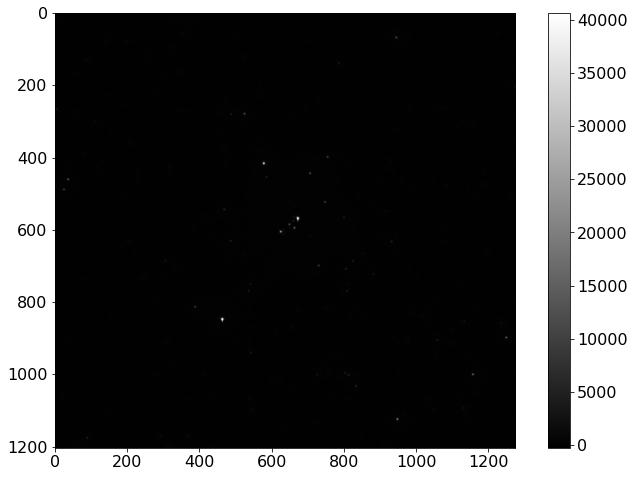

In [36]:
plt.imshow(fitsfile[0].data, cmap='gray')
plt.colorbar()

In [37]:
from matplotlib.colors import LogNorm

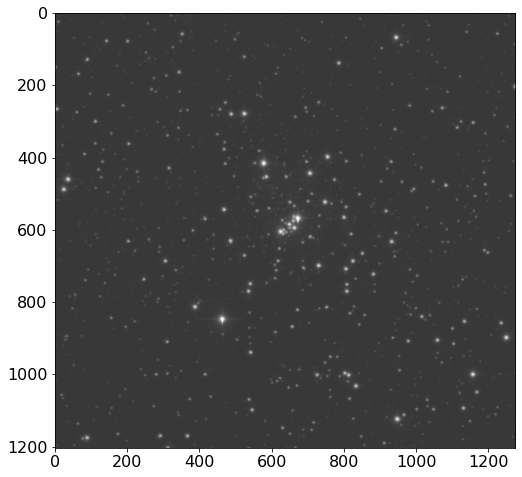

In [38]:
plt.imshow(fitsfile[0].data, cmap='gray', norm=LogNorm())

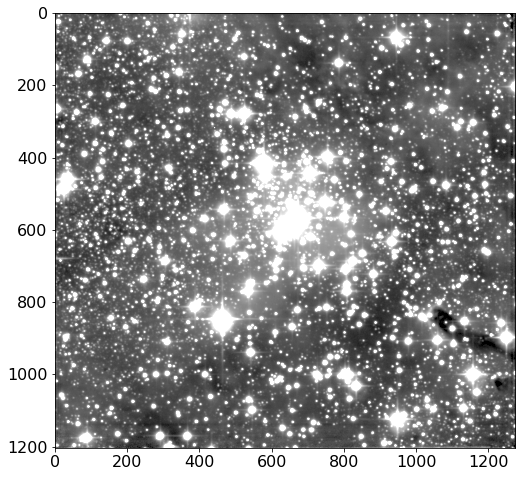

In [39]:
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize, ZScaleInterval

norm = ImageNormalize(fitsfile[0].data, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(fitsfile[0].data, cmap='gray', norm=norm)

<a id="norm"></a>
## Wyświetlanie - normalizacja

In [41]:
image_list = [os.path.join(dirpath,"M13_blue_000"+str(n)+".fits") for n in range(1, 5+1)]
image_concat = [fits.getdata(image) for image in image_list]

In [42]:
image_concat

[array([[489, 474, 519, ..., 447, 541, 519],
        [517, 508, 489, ..., 517, 490, 499],
        [500, 453, 518, ..., 537, 514, 537],
        ...,
        [449, 490, 519, ..., 469, 508, 541],
        [500, 521, 514, ..., 502, 478, 549],
        [480, 516, 535, ..., 494, 527, 491]], dtype=uint16),
 array([[494, 529, 549, ..., 492, 535, 560],
        [540, 530, 479, ..., 484, 514, 496],
        [500, 517, 514, ..., 520, 518, 552],
        ...,
        [498, 515, 509, ..., 527, 533, 531],
        [499, 495, 505, ..., 521, 447, 541],
        [513, 541, 522, ..., 522, 521, 472]], dtype=uint16),
 array([[517, 475, 503, ..., 515, 531, 531],
        [521, 434, 489, ..., 575, 484, 499],
        [492, 498, 516, ..., 535, 486, 512],
        ...,
        [504, 506, 515, ..., 486, 538, 518],
        [497, 536, 509, ..., 521, 485, 539],
        [560, 515, 573, ..., 520, 506, 541]], dtype=uint16),
 array([[487, 490, 546, ..., 478, 522, 522],
        [496, 533, 505, ..., 513, 511, 486],
        [551,

In [43]:
final_image = np.zeros(shape=image_concat[0].shape)

In [44]:
for image in image_concat:
    final_image += image

In [45]:
final_image

array([[2492., 2448., 2631., ..., 2422., 2655., 2650.],
       [2592., 2518., 2460., ..., 2583., 2497., 2478.],
       [2569., 2504., 2566., ..., 2562., 2505., 2660.],
       ...,
       [2373., 2465., 2544., ..., 2503., 2551., 2619.],
       [2330., 2539., 2541., ..., 2570., 2389., 2662.],
       [2653., 2533., 2645., ..., 2595., 2619., 2505.]])

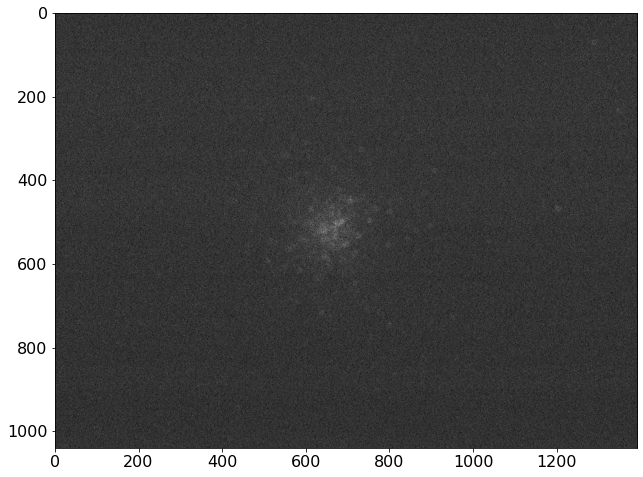

In [46]:
from astropy.visualization.stretch import SinhStretch, LinearStretch

norm = ImageNormalize(image_concat[0], interval=ZScaleInterval(), stretch=SinhStretch())

plt.imshow(image_concat[0], cmap='gray', norm=norm)

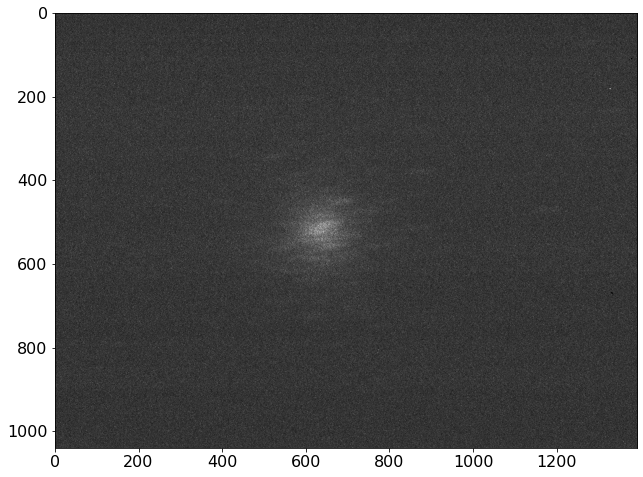

In [47]:
norm = ImageNormalize(final_image, interval=ZScaleInterval(), stretch=SinhStretch())

plt.imshow(final_image, cmap='gray', norm=norm)

<a id="aperture"></a>
# Prosta i szybka fotometria aperturowa

In [48]:
inputfile = "HST.fits"
hst = fits.open(os.path.join(dirpath, inputfile))
hst_image = hst[0].data[0]
hst_image -= np.median(hst_image)

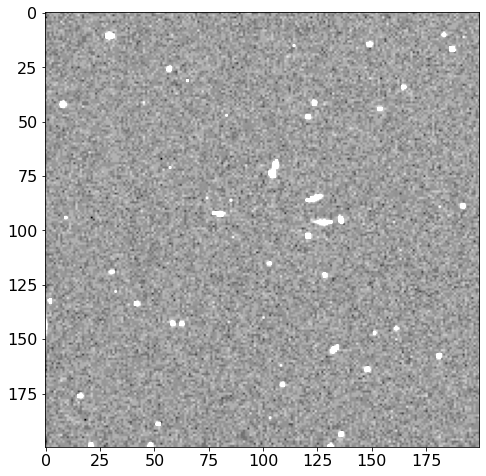

In [49]:
norm = ImageNormalize(hst_image, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(hst_image, cmap='gray', norm=norm)

In [71]:
# conda install -c conda-forge photutils
# pip install photutils

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(hst_image)  
daofind = DAOStarFinder(fwhm=1., threshold=3. * bkg_sigma)  
sources = daofind(hst_image)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

 id xcentroid ycentroid sharpness  ... sky    peak      flux        mag     
--- --------- --------- ---------- ... --- --------- --------- -------------
  1  154.3921 2.6294776 0.96668362 ...   0 3.0481665 1.0016747 -0.0018168135
  2 28.055047 10.438071 0.92126992 ...   0 957.42664 247.10142    -5.9821881
  3  182.9815 9.9287851 0.98126767 ...   0 98.207985 27.269781    -3.5892041
  4 193.01468 11.198598 0.99118143 ...   0 4.9572077 1.3140017   -0.29648983
  5 148.62036 14.186897 0.97040786 ...   0 275.19772 75.331538    -4.6924421
  6 114.33588 14.856605 0.99220428 ...   0 13.035855 3.5793474    -1.3845096
  7 186.84903 16.416154 0.97350816 ...   0 305.06717 82.983368    -4.7974776
  8 56.744032 26.137503 0.96809273 ...   0 116.05793 30.690866    -3.7175228
  9 64.926944  31.16492 0.99545482 ...   0 16.808004 4.6023068    -1.6574389
 10 164.42523  34.03539 0.97208375 ...   0 85.322853 23.346693    -3.4205634
...       ...       ...        ... ... ...       ...       ...           ...

In [72]:
from photutils.aperture import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=4.)  
phot_table = aperture_photometry(image, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1  154.3921 2.6294776    23893.069
  2 28.055047 10.438071    25325.545
  3  182.9815 9.9287851    25372.321
  4 193.01468 11.198598     25518.19
  5 148.62036 14.186897    25451.263
  6 114.33588 14.856605    25397.973
  7 186.84903 16.416154     25448.06
  8 56.744032 26.137503    25676.742
  9 64.926944  31.16492    25414.922
 10 164.42523  34.03539    25811.226
...       ...       ...          ...
 40 107.74162 161.51264    25333.259
 41 147.41102 163.83547    25520.856
 42 108.88996  170.9079    25599.248
 43 15.118192 175.96856      25452.6
 44 102.95346 186.13397    25709.428
 45 51.579362 188.99373    25276.801
 46 135.60664 194.71603    25499.491
 47 20.701911 198.07331    25256.839
 48  47.99196 198.29162    25558.643
 49 130.90872 198.93195    25589.504
Length = 49 rows


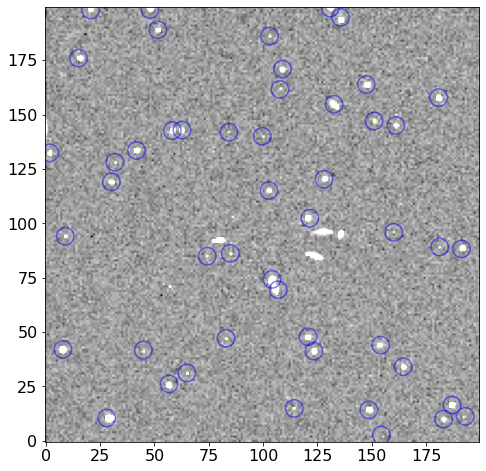

In [87]:
import matplotlib.pyplot as plt
plt.imshow(hst_image, cmap='gray', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5);